# 03 Models
---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import KBinsDiscretizer
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import matplotlib.patches as mpatches    
import warnings
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy as sp
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold,ShuffleSplit, cross_validate

seed = 0

In [2]:
train = pd.read_excel("df_02.xlsx", index_col=0)
test  = pd.read_excel("df_test_02.xlsx", index_col=0)

target = 'alcopops'

In [3]:
x_train = train.drop(columns = target)
y_train = train[target]

# **********************

x_test = test.drop(columns = target)
y_test = test[target]

# 1. Mandatory Models

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import Ridge
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network.multilayer_perceptron import MLPRegressor
from sklearn.gaussian_process.gpr import GaussianProcessRegressor

In [6]:
n_jobs = -1
models= [RandomForestRegressor(random_state=seed),
         AdaBoostRegressor(random_state=seed),
         GradientBoostingRegressor(random_state = seed),
         LinearRegression(),
         ARDRegression(),
         PassiveAggressiveRegressor(random_state = seed),
         Ridge(random_state = seed),
         MLPRegressor(random_state=seed), GaussianProcessRegressor(random_state=seed)]


# IsotonicRegression()

In [26]:
CV = 20
cv_df = pd.DataFrame(index=range(CV * len(models)))
score = 'neg_mean_squared_error'

x = x_train.copy()
y = y_train.copy()

entries = []
cv_df = pd.DataFrame()

for model in tqdm(models):
    
    model_name = model.__class__.__name__
    
    accuracies = cross_val_score(model,x, y, scoring = score, cv=CV)
   
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

_ = pd.DataFrame(entries, columns=['model', 'fold_idx', score])
cv_df['error'] = _.groupby('model')[score].agg('mean')

100%|██████████| 9/9 [00:09<00:00,  1.26s/it]


In [21]:
CV = 20
cv_df = pd.DataFrame(index=range(CV * len(models)))
#score = 'neg_mean_squared_error'
scorings = ['neg_mean_squared_error','neg_mean_absolute_error', 'explained_variance']

x = x_train.copy()
y = y_train.copy()


cv_df = pd.DataFrame()

for score in scorings:
    entries = []
    for model in tqdm(models):

        model_name = model.__class__.__name__

        accuracies = cross_val_score(model,x, y, scoring = score, cv=CV)

        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

    _ = pd.DataFrame(entries, columns=['model', 'fold_idx', score])
    cv_df[score] = _.groupby('model')[score].agg('mean')

100%|██████████| 9/9 [00:08<00:00,  1.06s/it]


In [22]:
cv_df.sort_values(by = 'neg_mean_squared_error', ascending = False)

,neg_mean_squared_error,neg_mean_absolute_error,explained_variance
model,,,
ARDRegression,-6.115519,-1.841157,0.167868
Ridge,-6.187110,-1.850427,0.144463
LinearRegression,-6.218388,-1.853848,0.131292
MLPRegressor,-6.364272,-1.782403,0.120223
AdaBoostRegressor,-6.385254,-2.040435,0.129775
GradientBoostingRegressor,-6.665784,-1.869743,-0.003241
RandomForestRegressor,-6.906544,-1.944464,0.011095
PassiveAggressiveRegressor,-8.275252,-2.094301,0.122505
GaussianProcessRegressor,-39.814397,-4.538240,-11.327364


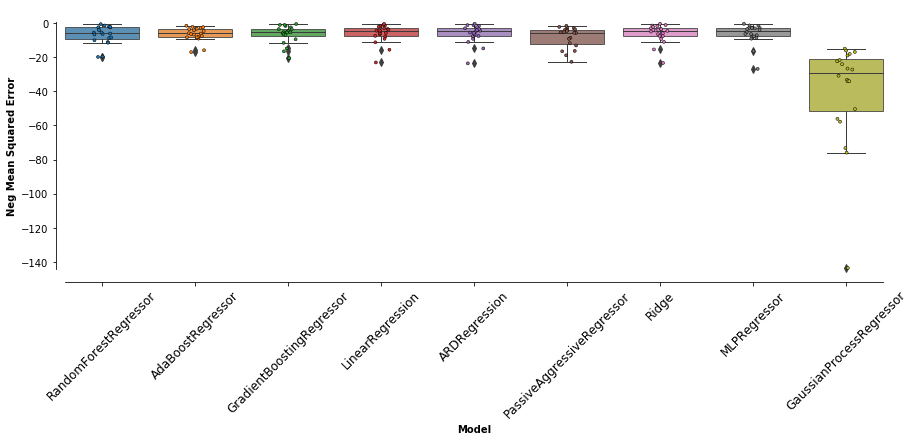

In [27]:
plt.figure(figsize = (15,5))
ax = sns.boxplot(x='model', y='neg_mean_squared_error', data=_,boxprops=dict(alpha=.8),linewidth=1)

sns.stripplot(x='model', y='neg_mean_squared_error', data=_, 
              size=3, jitter=True, edgecolor="black", linewidth=.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize =12) 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
#plt.title(variable,  fontweight = "bold")
plt.xlabel('Model',  fontweight = "bold")
plt.ylabel('Neg Mean Squared Error',  fontweight = "bold")
plt.show()

# Predict Test

In [28]:
model = ARDRegression()
model.fit(x, y)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

In [29]:
predictions = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
test_error = mean_squared_error(y_test, predictions)

print('>>> error: {}'.format(np.round(test_error, 2)))

>>> error: 10.47


In [35]:
predictions_df = pd.DataFrame({'y_real':y_test, 'y_pred': predictions})
predictions_df.head()

,y_real,y_pred
64,6.7,3.045967
63,0.7,2.971217
55,1.2,3.042035
111,5.8,5.111176
225,3.3,4.724516
